C:\Users\tianl\AppData\Local\Temp\ipykernel_68612\1609386285.py:9: RuntimeWarning: overflow encountered in square
  return (y**2) * np.exp(y) / (np.exp(y) - 1)**2
C:\Users\tianl\AppData\Local\Temp\ipykernel_68612\1609386285.py:20: RuntimeWarning: overflow encountered in scalar power
  return t**4 * np.exp(t) / (np.exp(t) - 1)**2


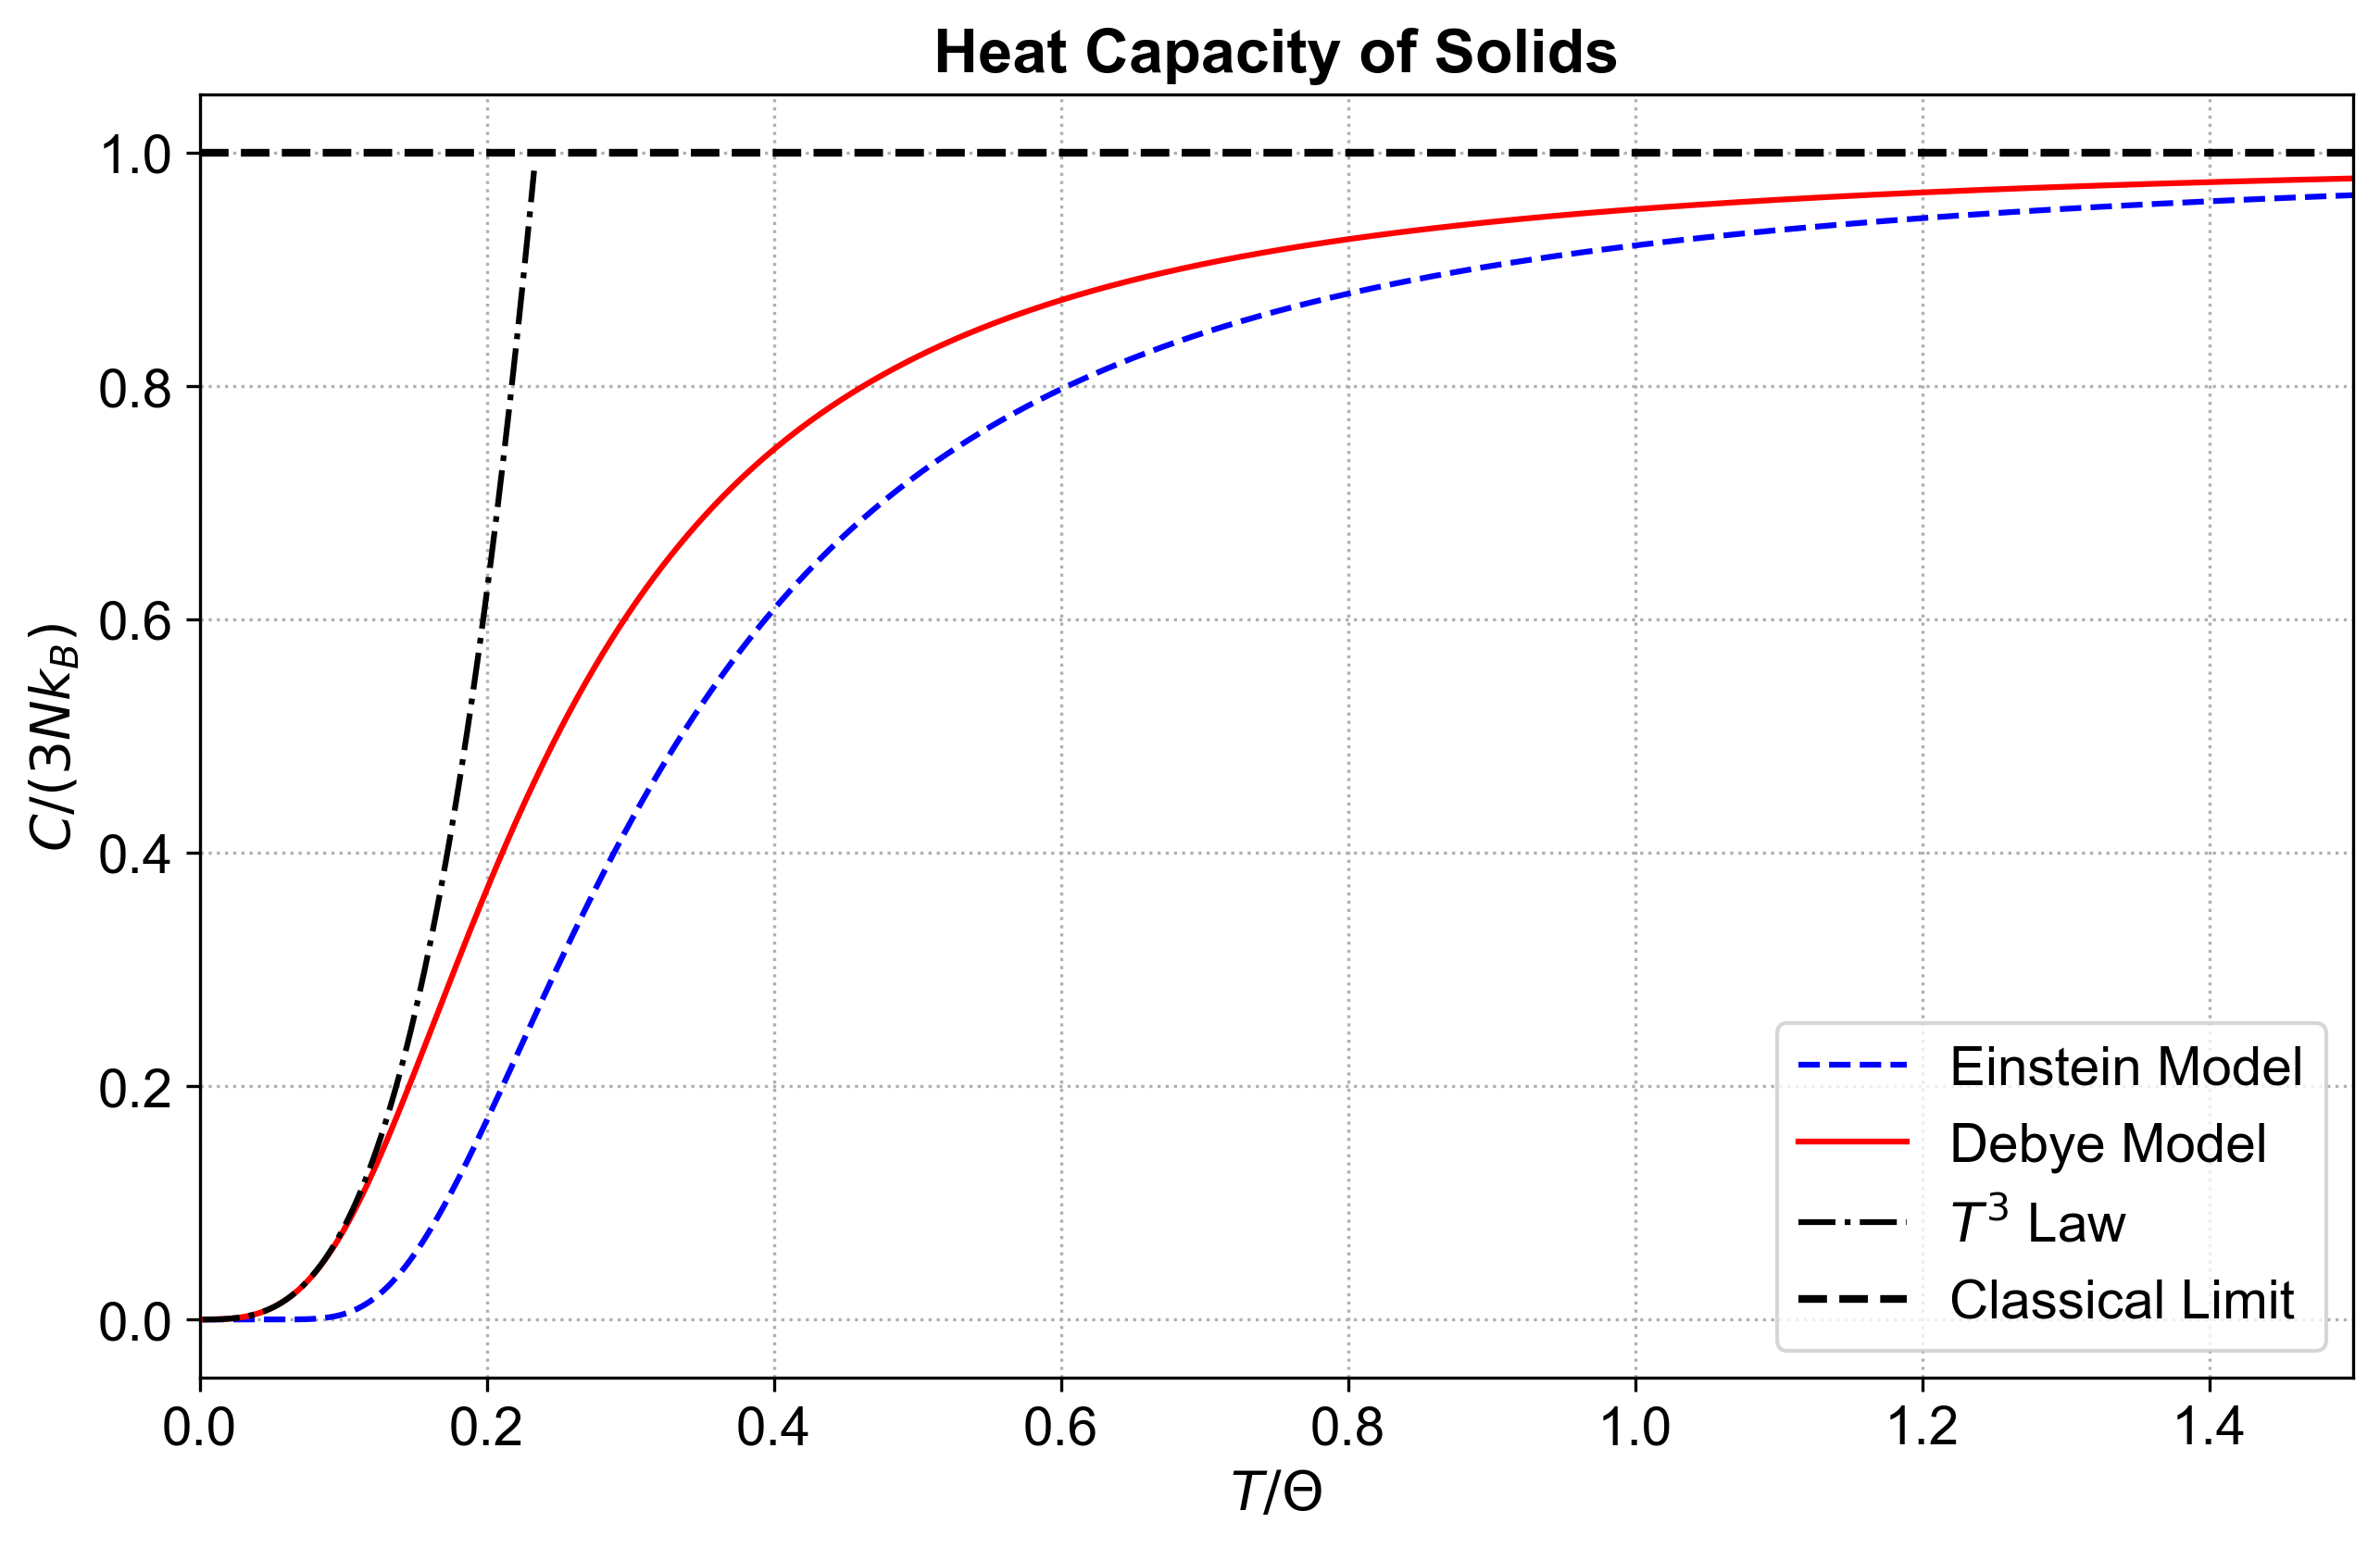

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define Einstein and Debye functions for heat capacity (dimensionless form)
def C_Einstein(x):
    # x = T/Theta_E; convert to y = Theta_E/T = 1/x
    y = 1/x
    # Avoid division by zero
    return (y**2) * np.exp(y) / (np.exp(y) - 1)**2

def C_Debye(x):
    # Debye function: numerical integration
    # x = T/Theta_D; y = Theta_D/T = 1/x
    y = 1/x
    # Integrand: t^4 * exp(t)/(exp(t) - 1)^2
    # Debye integral: 9 * (T/Theta)^3 * ∫_0^{Theta/T} f(t) dt
    import scipy.integrate as integrate

    def integrand(t):
        return t**4 * np.exp(t) / (np.exp(t) - 1)**2

    # Compute integral for each x
    vals = []
    for yi in y:
        val, _ = integrate.quad(integrand, 0, yi)
        vals.append(3 * (1/yi)**3 * val)
    return np.array(vals)

def t3_func(x):
    return x**3*(4 * np.pi**4) / 5

# Temperature ratio T/Theta
x = np.linspace(0.002, 1.5, 1000)

C_E = C_Einstein(x)
C_D = C_Debye(x)
CT3 = t3_func(x)
CT3 = CT3[CT3 < 1]
x_T3 = x[x < (5/(4 * np.pi**4))**(1/3)]

plt.rcParams.update({'font.size': 14, 'font.family': 'Arial'})
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.plot(x, C_E, label='Einstein Model', color='blue', linestyle='--')
ax.plot(x, C_D, label='Debye Model', color='red', linestyle='-')
ax.plot(x_T3, CT3, label=r'$T^3$ Law',lw = 1.5, color='k', linestyle='-.')
ax.hlines(1, 0, 1.5, colors='k',lw = 2, linestyles='--', label='Classical Limit')  
ax.set_xlabel(r'$T/\Theta$')
ax.set_ylabel(r'$C / (3Nk_B)$')
ax.legend(loc='lower right')
ax.set_title('Heat Capacity of Solids', fontsize=16, fontweight='bold')
ax.grid(ls = ':')   
ax.set_xlim(0, 1.5)
plt.show()